# Machine Learning  
## Project: Logistic Regression for Handwritten Digit Recognition

### Description:  
The aim of this project is to gain hands-on experience with a real-life machine learning application. The objective is to use a **Logistic Regression classifier** to predict handwritten digits based on their drawings.  

This project is divided into two parts:  

1. **Part 1**:  
   - Implement Logistic Regression from scratch using **Python** and standard libraries such as **NumPy**, **Pandas**, and **Matplotlib**.  
   - No machine learning toolkits (e.g., scikit-learn, TensorFlow) will be used in this part.  
   - The focus will be on procedural programming, building the model, training, and testing pipeline from the ground up.  
   - Code will be thoroughly commented for clarity and better understanding.

2. **Part 2**:  
   - Re-implement the same task using the **scikit-learn** library.  
   - Compare the results from this part with the implementation in Part 1 to analyze differences in accuracy, efficiency, and ease of use.  

### Tools & Environment:  
- **Programming Language**: Python  
- **Environment**: Jupyter Notebook  
- **Libraries (Part 1)**: NumPy, Pandas, Matplotlib, and other standard Python libraries  
- **Libraries (Part 2)**: scikit-learn  


### Part 1: Implementing Logistic Regression Classifier from Scratch

#### Problem:  
The objective is to gain a deeper understanding of Logistic Regression as a classification algorithm. Using the **MNIST dataset**, which consists of approximately 60,000 handwritten digit samples, the task is to develop a model capable of accurately predicting the digit represented by each drawing.


In [ ]:
## Here are the libraries will need for this part/
import pandas as pd
import numpy as np
import os
import scipy.spatial as sc
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

#### Step 1.1: Dataset Overview
The MNIST digits dataset is a widely used benchmark dataset in the field of machine learning and computer vision. MNIST stands for Modified National Institute of Standards and Technology, which is the organization that collected and curated the dataset. The MNIST dataset consists of a collection of 60,000 handwritten digit images for training and testing. These images are grayscale and have a fixed size of 28x28 pixels. Each image represents a single handwritten digit ranging from 0 to 9.  Each image in the dataset is accompanied by its corresponding label, indicating the digit it represents. The labels are represented as integers from 0 to 9, matching the handwritten digit in the image. This labeling allows for supervised learning tasks, where algorithms can learn to classify and recognize handwritten digits based on the provided training examples.

In [ ]:
'''The total images present in the mnist_dataset.csv are 60k, I am converting these images to 50k (train) and 10k (test) datasets,
which will then be divided into 40k (train) and 10k (validation test). '''

file_path = os.path.join('data', 'mnist_dataset.csv')
data = pd.read_csv(file_path)
print("The Total length of actual data is: ",len(data))

The Total length of actual data is:  60000


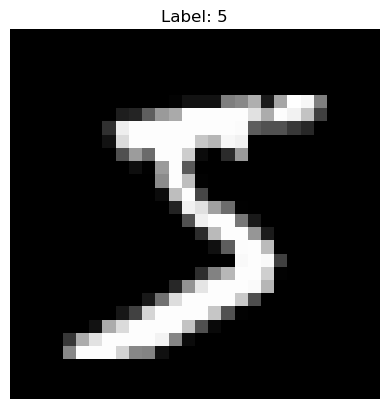

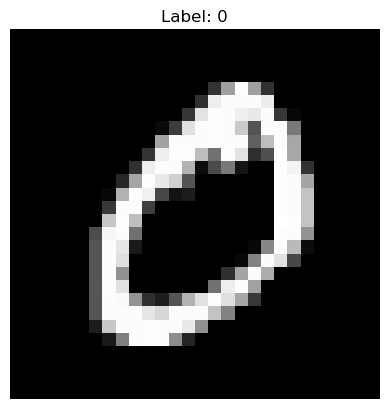

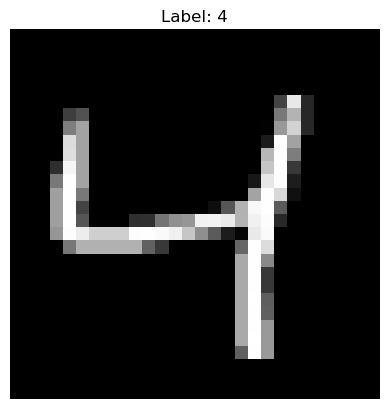

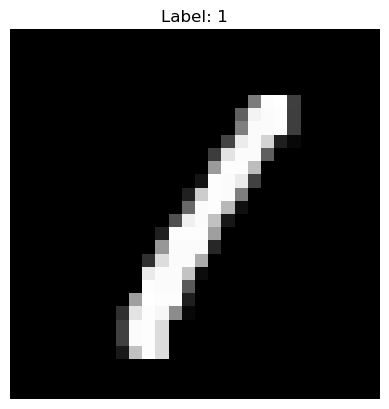

In [ ]:
'''Plotting Images'''
for i in range(4):
    image_data = data.iloc[i, 1:].values  # Exclude the label column
    image_data = image_data.reshape(28, 28)  # Reshape to 28x28 pixels

    plt.imshow(image_data, cmap='gray')
    plt.title("Label: " + str(data.iloc[i, 0]))
    plt.axis('off')  # Hide the axis
    plt.show()


#### Step 1.2: Data Preprocessing  

In this step, the data will be scaled using the **StandardScaler** function from the scikit-learn library to normalize the feature values effectively.  


In [ ]:
'''I'm extracting labels out of the data to scale easily.'''
y = data.iloc[:, 0]
x = data.iloc[:, 1:]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print("Label: \n",y[:5])
print("Scaled Features: \n",x_scaled[:5])

Label: 
 0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64
Scaled Features: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Step 1.3: Splitting the Dataset  

The dataset will be divided into training and testing sets. The training set will consist of **50,000 images**, while the test set will consist of **10,000 images**. 


In [ ]:
x_train_data = x_scaled[:50000]
y_train_data = y[:50000]

x_test_data = x_scaled[50000:]
y_test_data = y[50000:]

print("\nThe length of training data is: ",len(x_train_data))
print("\nThe length of test data is: ",len(x_test_data))


The length of training data is:  50000

The length of test data is:  10000


#### Step 1.4: Creating the Logistic Regression Classifier  

The implementation of **Multinomial Logistic Regression** will be done from scratch to classify the images into the 10 specified classes. The following components will be included:  

- **Softmax Function**: To calculate class probabilities for multiclass classification.  
- **Cross-Entropy Loss Function**: To compute the loss for multinomial logistic regression.  
- **Batch Gradient Descent**: To optimize the model parameters.  
- **Prediction Function**: To predict the labels of test samples using the trained multinomial logistic regression model.  


In [ ]:
def loss_function(h_x, y):
    loss = -(y * np.log(h_x))
    loss_per_sample = np.sum(loss, axis=1)
    return np.mean(loss_per_sample)

def h(data_X, theta):
    # data_X: 50000 x 785   785 x 10
    return data_X.dot(theta) # 50000 x 10

def soft_max(scores):
    '''scores - max of scores in that row keeps the numerical stability
    helps avoiding overflow or underflow for large value for which their exponentials
    approaches to infinity or zero'''
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True)) 
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def gradientDescent_multi(X, Y, alpha, n_epoch):
    m, n = X.shape  # 50000 x 785
    n_classes = Y.shape[1]
    J = []
    temp_theta = np.zeros((n, n_classes)) # 785 x 10
    
    for epoch in range(n_epoch):
        h_x = h(X, temp_theta)
        h_x_prob = soft_max(h_x) # 50000 x 10
        error = h_x_prob - Y  # 50000 x 10  -  50000 x 10
        gradient = (X.T.dot(error)) / m 
        # 50000 x 785 transpose 785 x 50000
        # 785 x 50000 dot 50000 x 10
        # 785 x 10
        temp_theta -= alpha * gradient # 785 x 10
        cost = loss_function(h_x_prob, Y)
        J.append(cost)
    
    return temp_theta, J

def Logistic_Regression_caller(x_train, y_train, n_classes, alpha, n_epoch):
    one_hot = []
    for i in range(n_classes):
        y_train_binary = np.where(y_train == i, 1, 0)
        one_hot.append(y_train_binary)
    
    one_hot_array = np.array(one_hot).T  # 50000 x 10
    if one_hot_array.ndim == 3:  # If the array has 3 dimensions
        one_hot_array = one_hot_array.squeeze(axis=0) 
    theta, J = gradientDescent_multi(x_train, one_hot_array, alpha, n_epoch)
    return theta, J # 785 x 10 

def prediction(X, theta_all):
    scores = X.dot(theta_all)
    predictions = np.argmax(scores, axis=1)
    return predictions

In [ ]:
train_x_0 = np.ones((len(x_train_data), 1)) # 50000 x 1 of ones dummy variable
adjusted_train_X = np.hstack((train_x_0, x_train_data))
# Parameters
alpha = 0.01
n_epoch = 1000
n_classes = 10

# Train Softmax Logistic Regression
theta_all, J = Logistic_Regression_caller(adjusted_train_X, y_train_data.to_numpy(), n_classes, alpha, n_epoch)

test_x_0 = np.ones((len(x_test_data), 1))
adjusted_test_X = np.hstack((test_x_0,x_test_data))

# Predict on Test Data
y_pred = prediction(adjusted_test_X, theta_all)
print("Predictions:", y_pred)
print("Validation Data: \n",y_test_data)
print("The Cost minimizes to be: ", J[-1])

Predictions: [3 8 6 ... 5 6 8]
Validation Data: 
 50000    3
50001    8
50002    6
50003    9
50004    6
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 10000, dtype: int64
The Cost minimizes to be:  0.34972068306224874


#### Step 1.5: Implementing Evaluation Functions  

Evaluation functions are implemented to assess the performance of the classifier on the test set. These functions calculate the following metrics:  

- **Classification Accuracy**: To measure the percentage of correct predictions.  
- **F1 Score**: To evaluate the balance between precision and recall.  
- **Confusion Matrix**: To provide detailed insights into the classifier's performance across all classes.  


Accuracy:  91.11
Micro F1 Score:  91.11000000000001
Macro F1 Score:  91.01185941675827


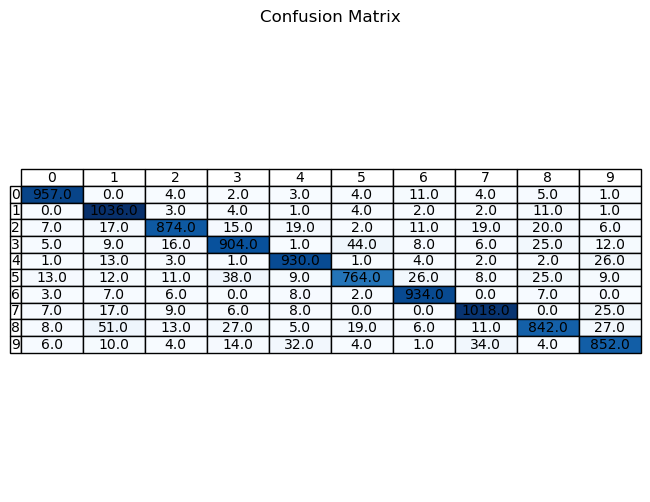

In [ ]:
def Calculate_conf_matrix(y_testing_data, y_predicted):
    conf_matrix = np.zeros((10, 10))
    for i in range(len(y_testing_data)):
        conf_matrix[y_testing_data[i]][y_predicted[i]] += 1
    return conf_matrix
        
def Evaluation(conf_matrix):
    true_p = np.diag(conf_matrix)
    false_p = np.sum(conf_matrix, axis=0) - true_p
    false_n = np.sum(conf_matrix, axis=1) - true_p               
    #Total accuracy     
    accuracy = np.sum(true_p) / np.sum(conf_matrix) 
   
    # Macro Average F1 Score
    precision = np.divide(true_p, (true_p + false_p), out=np.zeros_like(true_p), where=(true_p + false_p) != 0)
    recall = np.divide(true_p, (true_p + false_n), out=np.zeros_like(true_p), where=(true_p + false_n) != 0)
    f1 = np.divide(2 * precision * recall, (precision + recall), out=np.zeros_like(precision), where=(precision + recall) != 0)
    macro_f1 = np.mean(f1)
    
    # Micro Average F1 Score   
    total_true_p = np.sum(true_p)
    total_false_p = np.sum(false_p)
    total_false_n = np.sum(false_n)

    micro_precision = total_true_p / (total_true_p + total_false_p) if (total_true_p + total_false_p) > 0 else 0
    micro_recall = total_true_p / (total_true_p + total_false_n) if (total_true_p + total_false_n) > 0 else 0
    micro_f1 = (2 * micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) > 0 else 0

    return accuracy, micro_f1, macro_f1
    
def Plot_Confusion_Matrix(conf_matrix):    
    classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    table = plt.table(cellText=conf_matrix,
                    rowLabels=classes,
                    colLabels=classes,
                    cellLoc='center',
                    loc='center',
                    cellColours=plt.cm.Blues(conf_matrix / np.max(conf_matrix)))  # Color cells based on their values

    plt.title('Confusion Matrix')
    plt.show()

conf_matrix = Calculate_conf_matrix(y_test_data.to_numpy(), y_pred)
accuracy, micro_f1, macro_f1,  = Evaluation(conf_matrix)
print("Accuracy: ",accuracy * 100)
print("Micro F1 Score: " ,micro_f1 * 100)
print("Macro F1 Score: " ,macro_f1 * 100)
Plot_Confusion_Matrix(conf_matrix)

#### Step 1.6: Cross-Validation  

5-fold cross-validation is performed on the training data. The training dataset is divided into five parts, where four parts are used for training, and one part is used for validation. This process is repeated with a different part of the data used as the validation set in each iteration.  

The Logistic Regression function is executed for five learning rate values ranging from 0.001 to 0.01. The evaluation functions are used to calculate classification accuracy, F1 score, and the confusion matrix for each learning rate value.  

The results are presented as graphs:  
- A graph with learning rate values on the x-axis and classification accuracy on the y-axis.  
- Another graph with learning rate values on the x-axis and F1 score on the y-axis.  

All graphs are properly labeled to ensure clarity.  


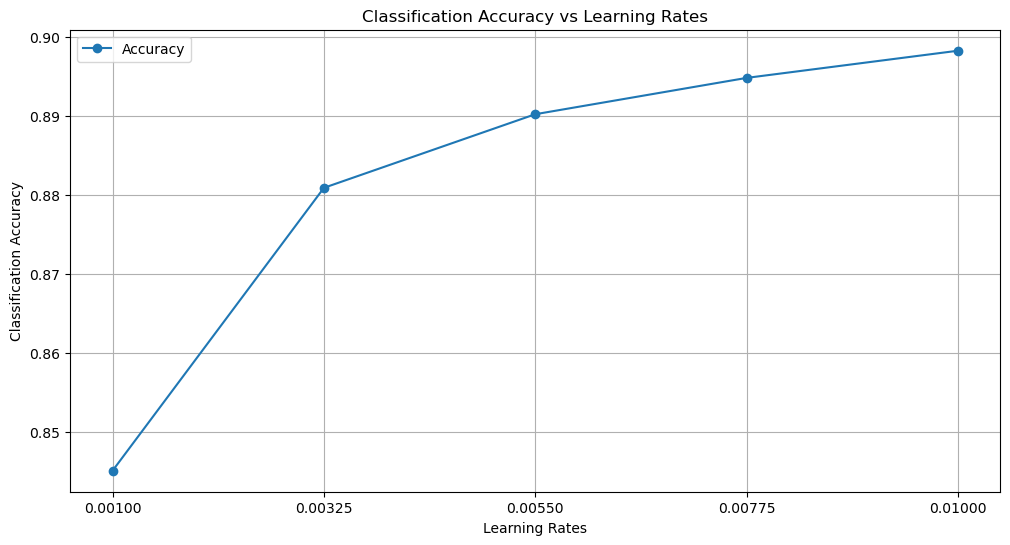

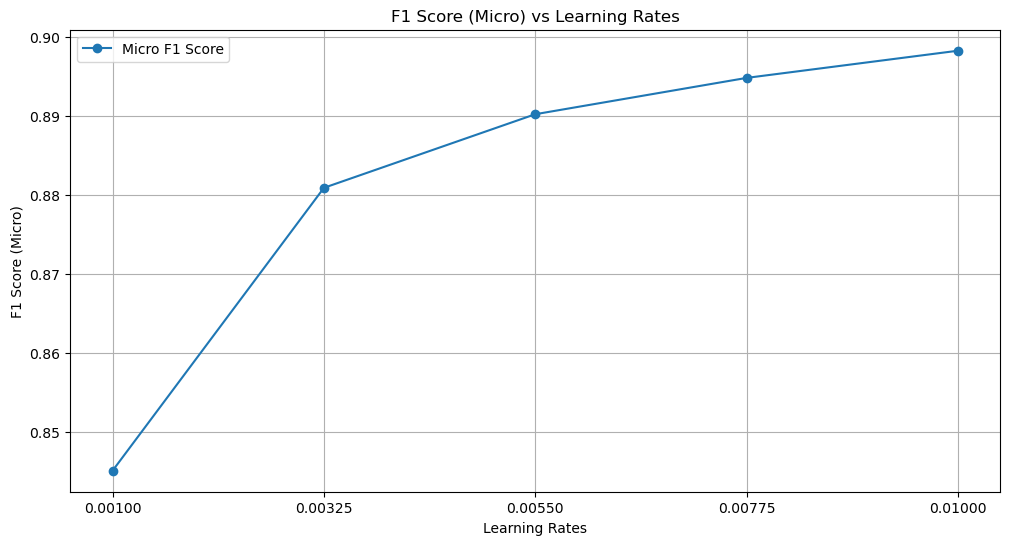

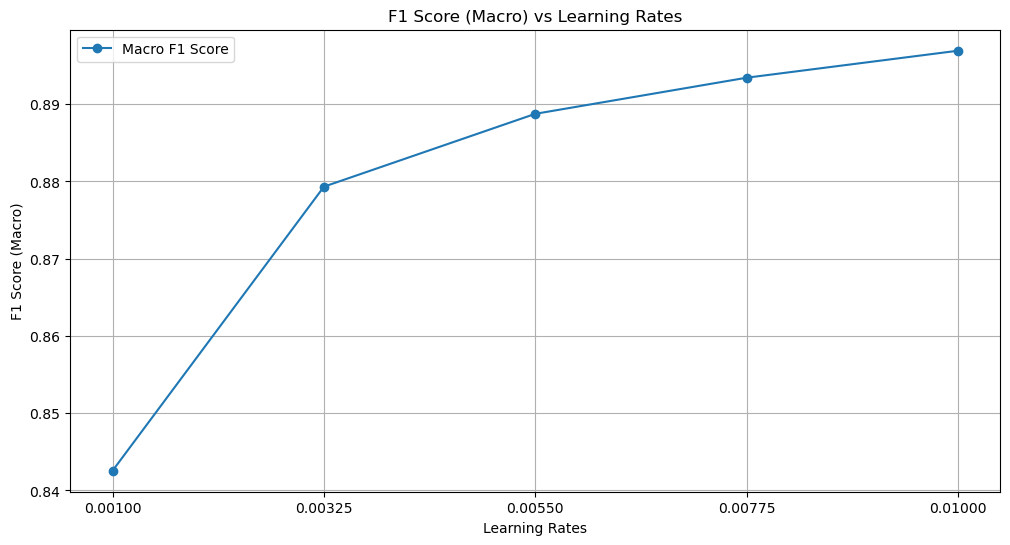

Confusion Matrix for the Learning Rate:  0.001


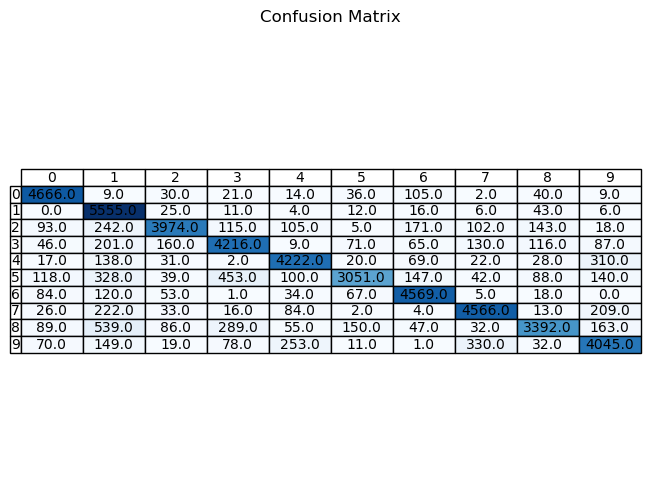

Confusion Matrix for the Learning Rate:  0.0032500000000000003


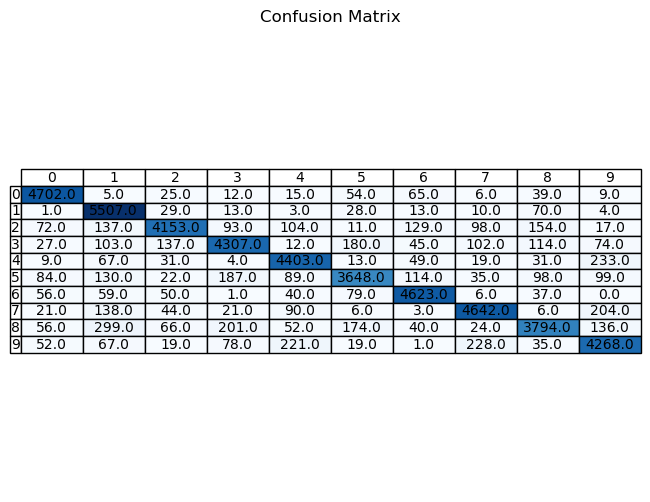

Confusion Matrix for the Learning Rate:  0.0055000000000000005


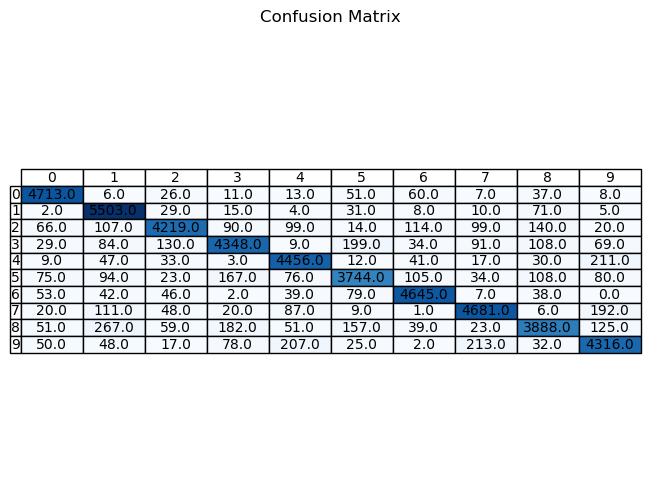

Confusion Matrix for the Learning Rate:  0.007750000000000001


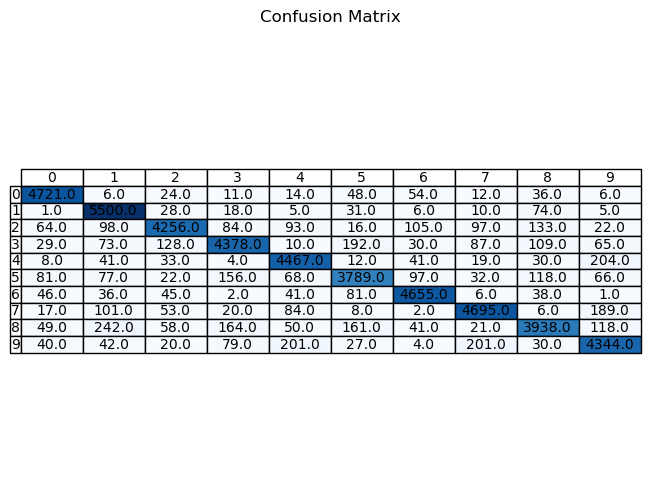

Confusion Matrix for the Learning Rate:  0.01


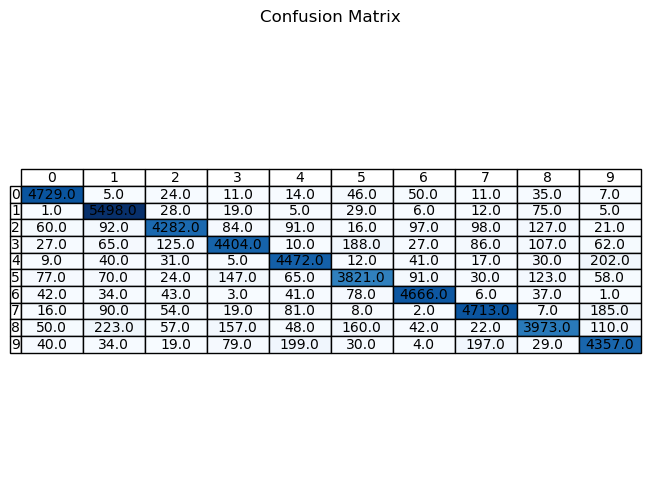

In [ ]:
num_parts = 5
part_size = len(adjusted_train_X) // num_parts
index = []
for i in range(num_parts):
    start_idx = i * part_size
    if i < num_parts - 1:
        end_idx = (i + 1) * part_size
    else:
        end_idx = len(adjusted_train_X)
    index.append([start_idx,end_idx])
adjusted_train_X_df = pd.DataFrame(adjusted_train_X)
y_train_data_df = pd.DataFrame(y_train_data)
conf_matr = []
learning_rates = np.linspace(0.001, 0.01, 5)     
for alpha in learning_rates:
    combined_conf_matrix = np.zeros((10, 10))    
    for i in range(5): 
        validation = index[i]
        temp_x = pd.concat([adjusted_train_X_df[:validation[0]], adjusted_train_X_df[validation[1]:]], ignore_index=True).to_numpy()
        temp_y = pd.concat([y_train_data_df[:validation[0]], y_train_data_df[validation[1]:]], ignore_index=True).to_numpy()
        temp_theta, temp_J = Logistic_Regression_caller(temp_x, temp_y, n_classes, alpha, n_epoch)
        predicted_output = prediction(adjusted_train_X_df[validation[0]:validation[1]].to_numpy(), temp_theta)
        conf = Calculate_conf_matrix(y_train_data_df[validation[0]:validation[1]].to_numpy().squeeze(), predicted_output)
        combined_conf_matrix += conf
            
    conf_matr.append(combined_conf_matrix)

accuracy = []
F1_micro = []
F1_macro = []
for i in range(5):
    accur, micr_f1, macr_f1 = Evaluation(conf_matr[i])
    accuracy.append(accur)
    F1_micro.append(micr_f1)
    F1_macro.append(macr_f1)

plt.figure(figsize=(12, 6))
plt.plot(learning_rates, accuracy, marker='o', label='Accuracy')
plt.xticks(learning_rates)
plt.xlabel('Learning Rates')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(learning_rates, F1_micro, marker='o', label='Micro F1 Score')
plt.xticks(learning_rates)
plt.xlabel('Learning Rates')
plt.ylabel('F1 Score (Micro)')
plt.title('F1 Score (Micro) vs Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(learning_rates, F1_macro, marker='o', label='Macro F1 Score')
plt.xticks(learning_rates)
plt.xlabel('Learning Rates')
plt.ylabel('F1 Score (Macro)')
plt.title('F1 Score (Macro) vs Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

for i in range(5):
    print("Confusion Matrix for the Learning Rate: ",learning_rates[i])
    Plot_Confusion_Matrix(conf_matr[i])


#### Step 1.7: Classification  

Using the best-performing learning rate, the model is run on the test dataset. The F1 score, classification accuracy, and confusion matrix are calculated and printed.  


Accuracy:  91.11
Micro F1 Score:  91.11000000000001
Macro F1 Score:  91.01185941675827


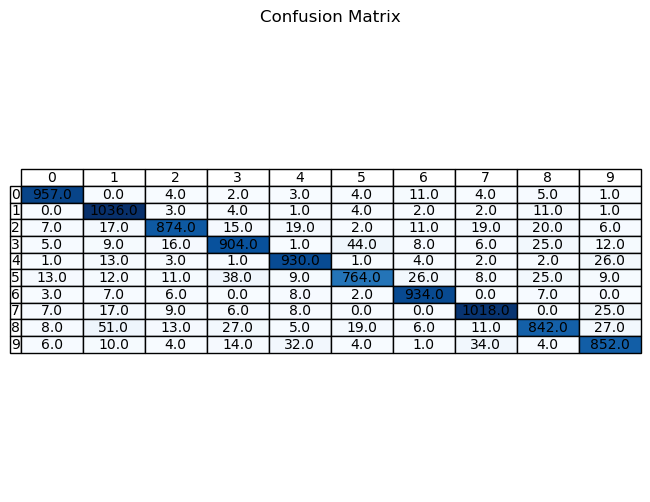

In [ ]:
'''The best value of learning rate is: 0.01'''
alpha = 0.01
n_epoch = 1000
n_classes = 10

# Train Softmax Logistic Regression
theta_all, J = Logistic_Regression_caller(adjusted_train_X, y_train_data.to_numpy(), n_classes, alpha, n_epoch)

# Predict on Test Data
y_pred = prediction(adjusted_test_X, theta_all)
confusion_matrix = Calculate_conf_matrix(y_test_data.to_numpy().squeeze(), y_pred)
accuracy, micro_f1, macro_f1 = Evaluation(confusion_matrix)
print("Accuracy: ",accuracy * 100)
print("Micro F1 Score: " ,micro_f1 * 100)
print("Macro F1 Score: " ,macro_f1 * 100)
Plot_Confusion_Matrix(confusion_matrix)

### Part 2: Logistic Regression Classifier Using scikit-learn  

scikit-learn’s Logistic Regression implementation is used to train and test the logistic regression model on the dataset. The `accuracy_score` function from scikit-learn is used to calculate the accuracy, and the `confusion_matrix` function is used to generate the confusion matrix on the test set.  

In [ ]:
# Here are the libraries and specific functions will be used in this part

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

c:\Users\s3769\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  91.06
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       984
           1       0.94      0.96      0.95      1093
           2       0.88      0.87      0.88       994
           3       0.89      0.89      0.89      1000
           4       0.91      0.93      0.92       980
           5       0.89      0.87      0.88       919
           6       0.93      0.95      0.94       981
           7       0.92      0.92      0.92      1060
           8       0.88      0.85      0.86       979
           9       0.89      0.90      0.90      1010

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



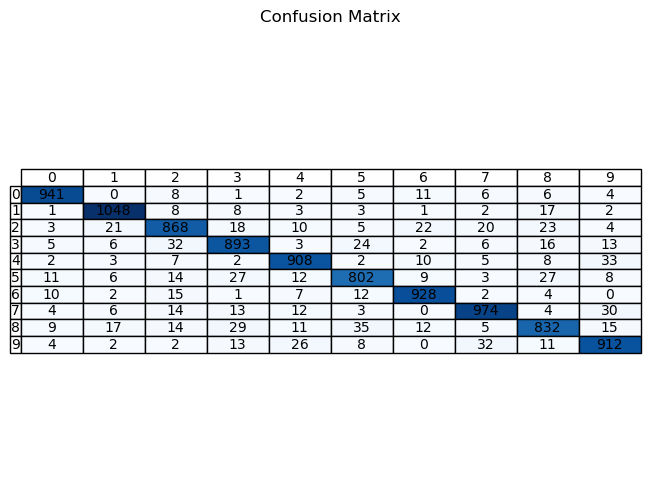

In [ ]:
alpha = 0.01
n_epoch = 1000

test_size = 10000 / len(x_scaled)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=test_size, random_state=42)

LR_model = LogisticRegression(C=1/alpha, solver='lbfgs', multi_class='multinomial', max_iter=n_epoch)
LR_model.fit(X_train, y_train)
y_pred_test = LR_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Accuracy: ", accuracy_test * 100)
print("Classification Report: \n", report_test)
Plot_Confusion_Matrix(conf_matrix_test)

### Conclusion  

This project provided valuable hands-on experience in implementing and evaluating Logistic Regression on a real-world dataset. By developing the model from scratch and then using scikit-learn, I gained a deeper understanding of the mathematics and practical applications of Logistic Regression.  

Both the custom implementation and the scikit-learn implementation achieved an accuracy of 91%, demonstrating the effectiveness of the model in classifying handwritten digits. Reliable performance metrics, including the F1 score and confusion matrix, further validated the model's accuracy.  

Comparing the two approaches highlighted the trade-offs between building algorithms manually and leveraging optimized libraries. This experience strengthened my understanding of key machine learning concepts, such as data preprocessing, model evaluation, and cross-validation. Overall, this project has provided a strong foundation for applying these techniques to other classification problems in the future.  
